In [3]:
%matplotlib widget
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy as Sci
import time
import glob
import pylab 
from mycolorpy import colorlist as mcp
from  tikzplotlib import save as tikz_save
mk=np.tile(['o','s','<','D','>','h','p','x','d','^'],3)
ck=np.tile(['k','r','b','g','m','y','c','k'],3)



In [4]:
sig=5.67e-8

nums=np.linspace(-2,3,1000)

lambda2=10**(nums)
C1=3.742*1e8
C2=14388
T=[5800.,2000.,1000.,500.,300.]
kB = 1.38e-23
hc = 1.239e-6
kB = hc/C2

In [32]:
def Fplanck(lambda1,Ti):
    C1=3.742*1e8
    C2=14388
    Ebl=C1*lambda1**(-5)/ ( np.exp(C2/lambda1/Ti)-1)
    return Ebl
def banda_lambda(lambda1,banda_lam,epsilon):
    lam1,lam2 = banda_lam
    return np.logical_and(lambda1<18,lambda1>12).astype(float)*epsilon
    

In [33]:
Ti = 300
lambdas = 10**np.linspace(-8,2,1000)
Ebb = np.trapz(Fplanck(lambdas,Ti),lambdas)

Ebb_st_b = sig*Ti**4

Ebb_frac = np.trapz(Fplanck(lambdas,Ti)*banda_lambda(lambdas,[12e-6,18e-6],0.25),lambdas)

/tmp/ipykernel_3440/1724537212.py:4: RuntimeWarning: overflow encountered in exp
  Ebl=C1*lambda1**(-5)/ ( np.exp(C2/lambda1/Ti)-1)


In [35]:
Ebb_frac/Ebb,Ebb_st_b

(0.06708716215212084, 459.27)

/tmp/ipykernel_5368/3772858862.py:8: RuntimeWarning: overflow encountered in exp
  Ebl=C1*lambda2**(-5)/ ( np.exp(C2/lambda2/Ti)-1)
/tmp/ipykernel_5368/3772858862.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(['%.2f'%(tickvalue*1e0) for tickvalue in ax0.get_xticks()])


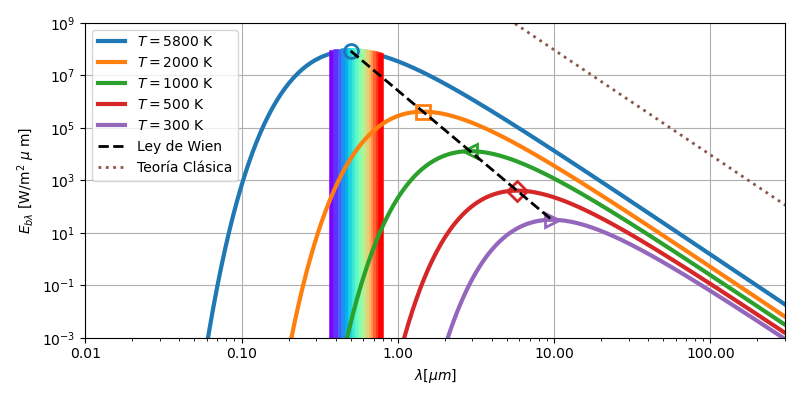

In [5]:
fig0,ax0 = plt.subplots(1,1,figsize=(8,4))
lm=np.asarray([2897.8/Ti for Ti in T])#*1e-6
Eblm=C1*lm**(-5)/ ( np.exp(C2/lm/T)-1)
ncolores = 17
colors = mcp.gen_color(cmap="rainbow",n=ncolores)

for k,Ti in enumerate(T):
    Ebl=C1*lambda2**(-5)/ ( np.exp(C2/lambda2/Ti)-1)
    etiq=r'$T=%0d$ K'%Ti
    ax0.plot(lambda2,Ebl,linewidth=3,label=etiq)
    if k==0:
        lambda_visible = np.linspace(0.38,0.78,ncolores)
        for j,lambdai in enumerate(lambda_visible):
            Ebli = C1*lambdai**(-5)/ ( np.exp(C2/lambdai/Ti)-1)
            ax0.plot([lambdai,lambdai],[0.001,Ebli],color = colors[j],linewidth=4)
    
plt.gca().set_prop_cycle(None)
for k,lmi in enumerate(lm):    
    ax0.plot((lmi),Eblm[k],marker=mk[k],linestyle='--',markersize=10,markerfacecolor='None',
                markeredgewidth=2)
ax0.plot(lm,Eblm,linestyle='--',color='k',label='Ley de Wien',linewidth=2)

curva_classic = 2*kB*5400/(lambda2)**4/1e-18
ax0.plot(lambda2,curva_classic,linestyle='dotted',label=r'Teoría Clásica',linewidth=2)
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_ylim(bottom=1e-3,top=1e9)
ax0.set_xlim(left=0.01,right=300)
ax0.grid()
ax0.set_xlabel(r'$\lambda[\mu m]$')
ax0.set_ylabel(r'$E_{b\lambda}$ [W/m$^2$ $\mu$ m]')
ax0.legend(numpoints=1)	
ax0.set_xticklabels(['%.2f'%(tickvalue*1e0) for tickvalue in ax0.get_xticks()])
#ax0.set_yticklabels(['%.3g'%(tickvalue*1e6) for tickvalue in ax0.get_yticks()])
fig0.tight_layout()
#plt.savefig('/home/juan/Documents/Ensenanza/latex/radiacion/planck.pdf')
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/radiacion/tikzs/planck_f.tikz')


In [ ]:
colors

In [7]:
['%.3g'%(tickvalue*1e6) for tickvalue in ax0.get_xticks()]

['1e+03',
 '1e+04',
 '1e+05',
 '1e+06',
 '1e+07',
 '1e+08',
 '1e+09',
 '1e+10',
 '1e+11']

/tmp/ipykernel_5368/991920124.py:4: RuntimeWarning: overflow encountered in exp
  Ebl=C1*lambda2**(-5)/ ( np.exp(C2/lambda2/Ti)-1)
/tmp/ipykernel_5368/991920124.py:6: RuntimeWarning: divide by zero encountered in log10
  ax0.semilogx((lambda2*1e6),np.log10(Ebl),linewidth=3,label=etiq)
/tmp/ipykernel_5368/991920124.py:15: RuntimeWarning: overflow encountered in exp
  Eblm=C1*lm**(-5)/ ( np.exp(C2/lm/T)-1)
/tmp/ipykernel_5368/991920124.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx((lmi*1e6),np.log10(Eblm[k]),marker=mk[k],linestyle='--',markersize=8,markerfacecolor='None',
/tmp/ipykernel_5368/991920124.py:25: RuntimeWarning: divide by zero encountered in log10
  ax0.semilogx((lm*1e6),np.log10(Eblm),linestyle='--',color='k',label='Ley de Wien',linewidth=2)


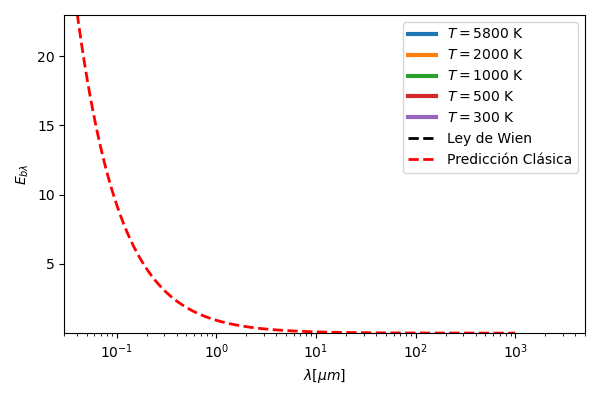

In [9]:
fig0,ax0 = plt.subplots(1,1,figsize=(6,4))

for k,Ti in enumerate(T):
	Ebl=C1*lambda2**(-5)/ ( np.exp(C2/lambda2/Ti)-1)
	etiq=r'$T=%0d$ K'%Ti
	ax0.semilogx((lambda2*1e6),np.log10(Ebl),linewidth=3,label=etiq)
	#raise ValueError('alto')
c = 3e8

ax0.set_xlim([0.03,5000])
ax0.set_ylim(bottom=0.001)

lm=np.asarray([2897.8/Ti for Ti in T])*1e-6

Eblm=C1*lm**(-5)/ ( np.exp(C2/lm/T)-1)


curva_classic = 2*kB*5400/lambda2/1e-6

k=0
plt.gca().set_prop_cycle(None)
for k,lmi in enumerate(lm):    
    plt.semilogx((lmi*1e6),np.log10(Eblm[k]),marker=mk[k],linestyle='--',markersize=8,markerfacecolor='None',
                markeredgewidth=2)
ax0.semilogx((lm*1e6),np.log10(Eblm),linestyle='--',color='k',label='Ley de Wien',linewidth=2)    

ax0.semilogx(lambda2,curva_classic,linestyle='--',color='r',label='Predicción Clásica',linewidth=2)    



ax0.set_xlabel(r'$\lambda[\mu m]$')
ax0.set_ylabel(r'$E_{b\lambda}$')
ax0.legend(numpoints=1)	
fig0.tight_layout()
#plt.savefig('/home/juan/Documents/Ensenanza/latex/radiacion/planck.pdf')
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/radiacion/planck.tikz')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is se

In [10]:


for k,lmi in enumerate(lm):    
    plt.semilogx((lmi*1e6),np.log10(Eblm[k]),marker=mk[k],linestyle='--',markersize=8,markerfacecolor='None',
                markeredgewidth=2)
ax0.semilogx((lm*1e6),np.log10(Eblm),linestyle='--',color='k',label='Ley de Wien',linewidth=2)    
ax0.set_xlabel(r'$\lambda[\mu m]$')
ax0.set_ylabel(r'$E_{b\lambda}$')
ax0.legend(numpoints=1)	
fig0.tight_layout()
#plt.savefig('/home/juan/Documents/Ensenanza/latex/radiacion/planck.pdf')
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/radiacion/planck.tikz')

/tmp/ipykernel_5368/4166099736.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx((lmi*1e6),np.log10(Eblm[k]),marker=mk[k],linestyle='--',markersize=8,markerfacecolor='None',
/tmp/ipykernel_5368/4166099736.py:4: RuntimeWarning: divide by zero encountered in log10
  ax0.semilogx((lm*1e6),np.log10(Eblm),linestyle='--',color='k',label='Ley de Wien',linewidth=2)
